In [1]:
lfs=require 'lfs'
if string.find(lfs.currentdir(), 'visualization') then
    lfs.chdir('../')
end

In [2]:
require 'gnuplot'
require 'utils.FreyManager'
require 'models.CnnVae'
require 'optim'
require 'cunn'
require 'image'
Plot = require 'itorch.Plot'
cmd = {h_size = 400, z_size = 2}

In [3]:
N = 50
data = FreyManager(50):cuda()
saved = torch.load('save/Vae.t7')
vae = saved.vae

# Image Reconstruction

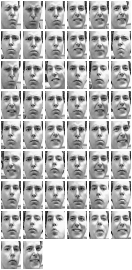

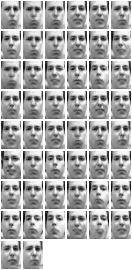

In [4]:
data:shuffle()
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(input:reshape(N, 1, 28, 20))
-- reconstructed image
itorch.image(recon:reshape(N, 1, 28, 20))

# Encoding Distribution

In [2]:
data:shuffle(1000)
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
--     plt = Plot()
--     plt:circle(mu[{{},1}], mu[{{},2}], '#00F0F0')
--     plt:title("Distribution")
--     plt:draw()

In [3]:
plt = Plot()
mu = mulv[{{},1}]:clone():double()
plt:histogram(mu)
plt:title("hist")
plt:draw()

# Image Generation

In [8]:
require 'utils.grid'
nRow = 10
nCol = 14
dist = 2
code = torch.Tensor(nRow*nCol,2)
x = torch.linspace(-dist,dist,nCol)
y = torch.linspace(-dist,dist,nRow)
idx = 0
for yi = y:nElement(),1,-1 do
    for xi = 1,x:nElement() do
        idx = idx + 1
        code[{idx,1}] = x[xi]
        code[{idx,2}] = y[yi]
    end
end

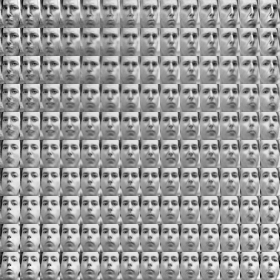

In [9]:
recon = vae.decoder:forward(code:cuda())
recon = recon:view(nRow*nCol,28,20)
images = grid.stack(recon, nRow, nCol)
itorch.image(images)